In [1]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [2]:

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
X_valid,X_train = X_train_full[:5000]/255.0 ,X_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000] ,y_train_full[5000:]
X_test = X_test/255.0

In [6]:
for i in y_train:
    print(i)

7
3
4
6
1
8
1
0
9
8
0
3
1
2
7
0
2
9
6
0
1
6
7
1
9
7
6
5
5
8
8
3
4
4
8
7
3
6
4
6
6
3
8
8
9
9
4
4
0
7
8
1
0
0
1
8
5
7
1
7
5
5
9
9
4
2
5
3
7
4
6
6
0
1
0
1
2
4
8
5
3
5
0
0
6
4
3
8
3
7
1
4
3
9
2
2
0
3
6
6
7
4
3
2
2
4
9
1
0
5
2
4
8
2
1
0
8
4
4
8
0
6
4
1
4
9
6
3
1
2
9
0
1
0
4
2
9
9
4
3
8
6
9
3
0
6
7
0
3
1
4
2
3
3
0
4
2
5
5
6
3
7
2
8
5
9
2
0
1
1
8
2
9
3
1
4
1
5
7
6
4
7
7
8
3
9
3
0
5
1
3
2
0
3
0
4
0
7
4
8
8
9
0
0
1
8
7
3
9
9
5
5
9
6
7
8
2
4
6
9
8
1
6
7
9
1
6
2
0
9
6
6
2
9
1
1
2
1
3
1
5
2
7
8
0
1
0
2
8
0
2
7
3
7
5
5
1
8
2
2
6
9
1
8
7
4
0
6
0
7
3
1
0
6
6
0
9
3
4
6
7
8
9
7
3
0
0
4
0
2
6
7
5
4
6
4
8
2
0
8
7
1
7
5
1
1
2
2
7
5
6
6
7
4
2
3
9
0
2
0
9
0
4
3
4
7
7
0
3
6
0
4
3
8
6
8
1
3
8
9
0
9
0
8
0
2
8
7
8
7
9
1
7
0
3
1
4
2
3
3
8
4
9
5
6
6
4
7
0
8
3
9
8
0
6
1
8
2
5
3
2
4
5
5
6
6
9
7
3
8
9
9
3
0
8
1
3
2
0
3
2
4
9
5
9
6
4
7
3
8
4
9
3
6
5
2
7
5
8
6
2
2
7
5
5
1
9
7
1
1
8
8
3
3
3
8
2
7
2
1
5
7
3
1
4
4
7
7
7
2
4
6
5
5
9
3
5
9
3
9
8
0
0
8
0
7
6
3
0
0
0
3
7
7
8
0
8
1
9
1
2
2
4
1
1
6
6
0
0
5
4
3
9
3
1
6
7
3
0
5


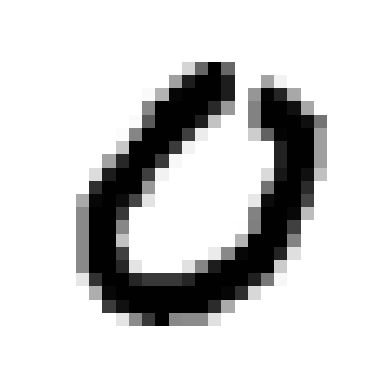

In [7]:
plt.imshow(X_train[7],cmap='binary')
plt.axis('off')
plt.show()

In [8]:
class_names = [0,1,2,3,4,5,6,7,8,9]

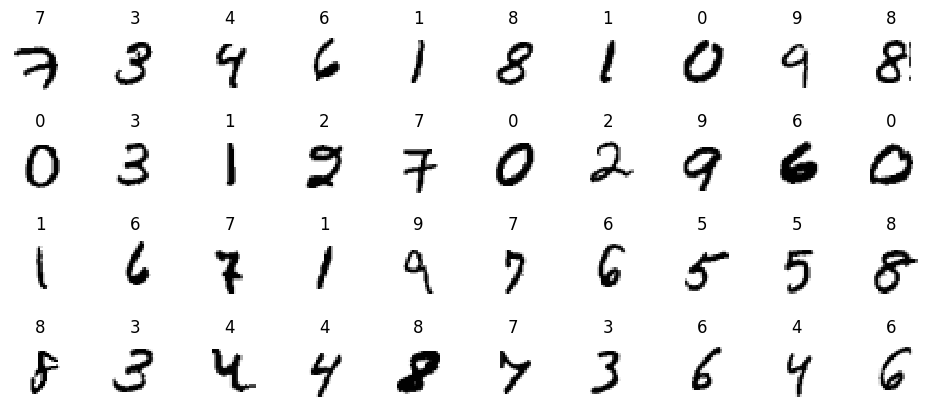

In [9]:
n_rows = 4
n_col = 10
plt.figure(figsize=(n_col*1.2,n_rows*1.2))
for row in range(n_rows):
    for col in range(n_col):
        index = row*n_col + col
        plt.subplot(n_rows,n_col,index+1)
        plt.imshow(X_train[index],cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [10]:
model = keras.models.Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(keras.layers.Flatten()),
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [11]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [15]:
model.get_layer(hidden1.name) is hidden1

True

In [16]:
weights,biases = hidden1.get_weights()

In [17]:
weights

array([[ 0.00898314, -0.01202479, -0.00238979, ...,  0.00199211,
         0.01953809,  0.01619853],
       [-0.05691895, -0.00036471,  0.04418132, ...,  0.01188125,
         0.0504024 ,  0.04799796],
       [-0.04777691,  0.0390894 , -0.07352   , ..., -0.05819925,
        -0.00598026,  0.04225409],
       ...,
       [-0.04108811, -0.03826254, -0.02697936, ...,  0.03539818,
         0.00709996,  0.01251084],
       [ 0.04184381,  0.03648063,  0.01324968, ..., -0.01004161,
         0.03904944, -0.04691955],
       [-0.02379139, -0.01390688,  0.07239315, ..., -0.04602143,
         0.07085961,  0.07033816]], dtype=float32)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [20]:
histroy = model.fit(X_train,y_train,epochs=1,
                    validation_data=(X_valid,y_valid))

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7256 - loss: 1.0306 - val_accuracy: 0.9178 - val_loss: 0.3009


In [21]:
histroy.epoch

[0]

In [22]:
histroy.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9012 - loss: 0.3522


[0.3041432201862335, 0.9174000024795532]

In [29]:
x_new = X_test[:6]

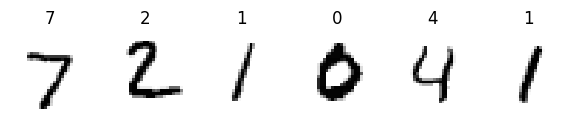

In [30]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,6,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [31]:
y_pred = np.argmax(model.predict(x_new),axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


array([7, 2, 1, 0, 4, 1], dtype=int64)

In [32]:
np.array(class_names)[y_pred]

array([7, 2, 1, 0, 4, 1])

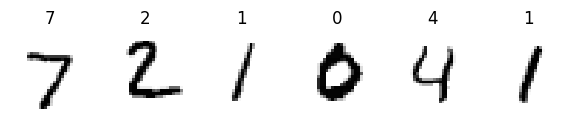

In [34]:
plt.figure(figsize=(7.2,6.2))
for index,image in enumerate(x_new):
        plt.subplot(1,6,index+1)
        plt.imshow(image,cmap='binary',interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_test[index]],fontsize=12)
plt.subplots_adjust(wspace=0.2,hspace=0.7)
plt.show()

In [ ]:
model.save('handwritten_model.keras')

In [35]:
import cv2 as cv 
import numpy as np

img = cv.imread('digit.jpg',cv.IMREAD_GRAYSCALE)
img = cv.resize(img,(28,28))
img = img/255.0
img = img.reshape(1,28,28)
prediction = model.predict(img)
predicted_label = np.argmax(prediction)
print(predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
5
